In [1]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import *

In [4]:
# Define the ImageDataGenerator for preprocessing and data augmentationb
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

In [7]:
train_generator = datagen.flow_from_directory(
    'D:\\root\\data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=100,
    shuffle=True 
)

Found 6043 images belonging to 2 classes.


In [9]:
test_generator = datagen.flow_from_directory(
    'D:\\root\\data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset = 'validation'
)

Found 1510 images belonging to 2 classes.


In [17]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation='relu',
                                  input_shape=(64, 64, 3)),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    
    tensorflow.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tensorflow.keras.layers.Dropout(0.25),

    tensorflow.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    tensorflow.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tensorflow.keras.layers.Dropout(0.5),

    tensorflow.keras.layers.Flatten(),
    
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(

    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),

    loss=tensorflow.keras.losses.BinaryCrossentropy(),

    metrics=['accuracy']

)

In [18]:
# Fit the model using the data generator
history = model.fit(
    train_generator,
    steps_per_epoch=150,
    epochs=15,
    validation_data=test_generator,
    validation_steps=40
)

Epoch 1/15
 30/150 [=====>........................] - ETA: 31s - loss: 0.6987 - accuracy: 0.5354

D:\python anaconda\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


150/150 [==============================] - 60s 391ms/step - loss: 0.4890 - accuracy: 0.7556 - val_loss: 0.2446 - val_accuracy: 0.9195
Epoch 2/15
150/150 [==============================] - 48s 317ms/step - loss: 0.3067 - accuracy: 0.8692 - val_loss: 0.2399 - val_accuracy: 0.9148
Epoch 3/15
150/150 [==============================] - 48s 322ms/step - loss: 0.2749 - accuracy: 0.8899 - val_loss: 0.1992 - val_accuracy: 0.9312
Epoch 4/15
150/150 [==============================] - 49s 325ms/step - loss: 0.2208 - accuracy: 0.9210 - val_loss: 0.1714 - val_accuracy: 0.9508
Epoch 5/15
150/150 [==============================] - 48s 318ms/step - loss: 0.2072 - accuracy: 0.9258 - val_loss: 0.2051 - val_accuracy: 0.9305
Epoch 6/15
150/150 [==============================] - 48s 319ms/step - loss: 0.1872 - accuracy: 0.9308 - val_loss: 0.1813 - val_accuracy: 0.9367
Epoch 7/15
150/150 [==============================] - 48s 320ms/step - loss: 0.1887 - accuracy: 0.9260 - val_loss: 0.1696 - val_accuracy: 0.9

In [19]:
model.evaluate(test_generator)


48/48 [==============================] - 8s 160ms/step - loss: 0.1268 - accuracy: 0.9563


[0.12684163451194763, 0.9562913775444031]

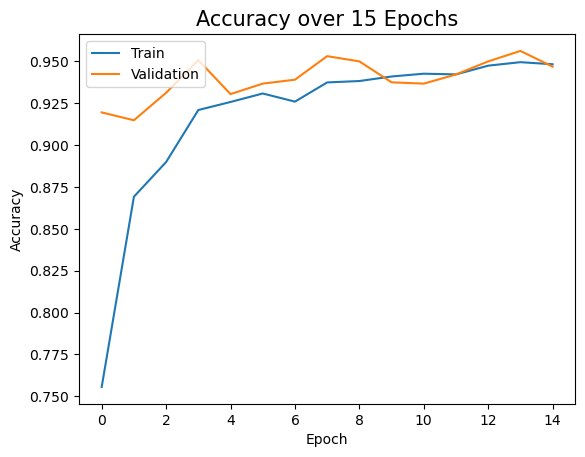

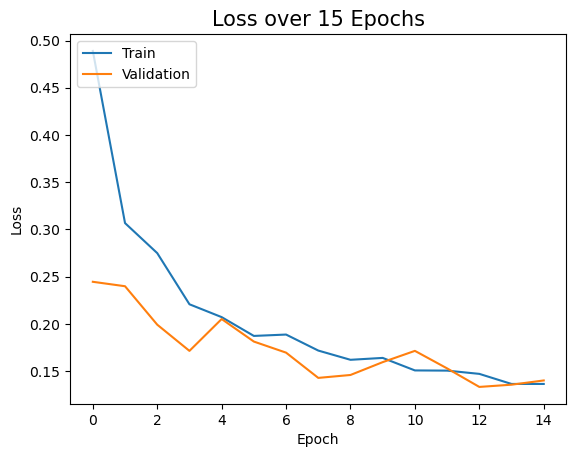

In [20]:
import matplotlib.pyplot as plt

def plot_acc_loss(history, epochs):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_acc_loss(history, 15)

In [21]:
model.save('mask_find2.keras')

In [22]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mask_find2.keras')


1/1 [==============================] - 0s 441ms/step


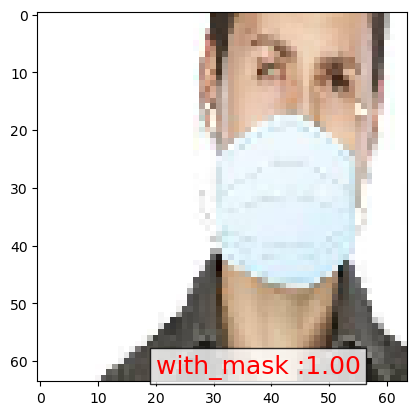

In [23]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('D:/root/train_test/test_data/with_mask/5.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = loaded_model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='without_mask :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='with_mask :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()